In [12]:
import sys
import numpy as np
import random
import time
import matplotlib.pyplot as plt

def alg1(data):
  data = list(data)
  changes = True
  while changes:
    changes = False
    for i in range(len(data) - 1):
      if data[i + 1] < data[i]:
        data[i], data[i + 1] = data[i + 1], data[i]
        changes = True
  return data

def alg2(data):
  if len(data) <= 1:
    return data
  else:
    split = len(data) // 2
    left = iter(alg2(data[:split]))
    right = iter(alg2(data[split:]))
    result = []
    # note: this takes the top items off the left and right piles
    left_top = next(left)
    right_top = next(right)
    while True:
      if left_top < right_top:
        result.append(left_top)
        try:
          left_top = next(left)
        except StopIteration:
          # nothing remains on the left; add the right + return
          return result + [right_top] + list(right)
      else:
        result.append(right_top)
        try:
          right_top = next(right)
        except StopIteration:
          # nothing remains on the right; add the left + return
          return result + [left_top] + list(left)

In [13]:
data=random.sample(range(0,100),20)
print(alg1(data))
print(alg2(data))

[7, 9, 13, 23, 35, 44, 48, 49, 58, 59, 60, 63, 64, 65, 74, 79, 85, 86, 97, 99]
[7, 9, 13, 23, 35, 44, 48, 49, 58, 59, 60, 63, 64, 65, 74, 79, 85, 86, 97, 99]


In [14]:
def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result

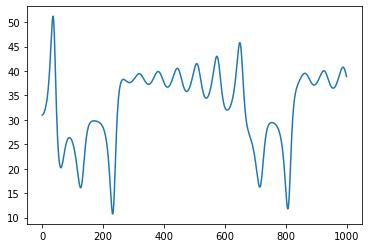

In [15]:
x=range(1000)
y=data1(1000)
plt.plot(x,y)
plt.show()

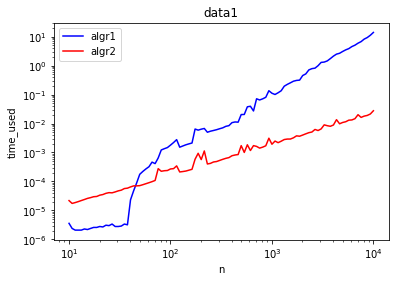

In [16]:
N=np.logspace(1,4,100,endpoint=True)
timeused_1=[]
timeused_2=[]
for n in N:
    data_gen=data1(int(n))
    startime=time.perf_counter()
    alg1(data_gen)
    endtime=time.perf_counter()
    timeused=endtime-startime
    timeused_1.append(timeused)

    startime=time.perf_counter()
    alg2(data_gen)
    endtime=time.perf_counter()
    timeused=endtime-startime
    timeused_2.append(timeused)

plt.axes(xscale='log',yscale='log')
plt.xlabel('n')
plt.ylabel('time_used')
plt.plot(N,timeused_1,color='b',label='algr1')
plt.plot(N,timeused_2,color='r',label='algr2')
plt.title('data1')
plt.legend()
plt.savefig('alg12ondata1.jpg')
plt.show()

In [17]:
def data2(n):
    return list(range(n))

def data3(n):
    return list(range(n, 0, -1))

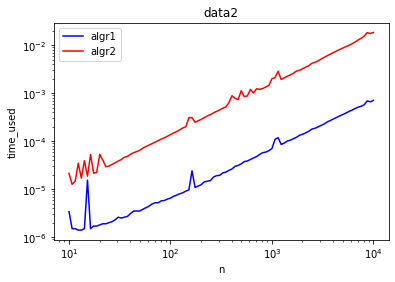

In [18]:
N=np.logspace(1,4,100,endpoint=True)
timeused_1=[]
timeused_2=[]
for n in N:
    data_gen=data2(int(n))
    startime=time.perf_counter()
    alg1(data_gen)
    endtime=time.perf_counter()
    timeused=endtime-startime
    timeused_1.append(timeused)

    startime=time.perf_counter()
    alg2(data_gen)
    endtime=time.perf_counter()
    timeused=endtime-startime
    timeused_2.append(timeused)

plt.axes(xscale='log',yscale='log')
plt.xlabel('n')
plt.ylabel('time_used')
plt.plot(N,timeused_1,color='b',label='algr1')
plt.plot(N,timeused_2,color='r',label='algr2')
plt.title('data2')
plt.legend()
plt.savefig('alg12ondata2.jpg')
plt.show()

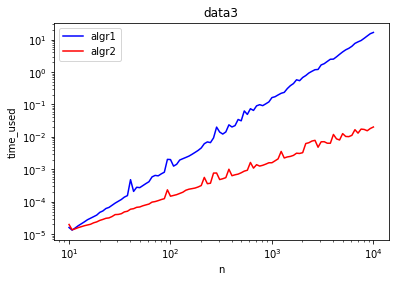

In [19]:
N=np.logspace(1,4,100,endpoint=True)
timeused_1=[]
timeused_2=[]
for n in N:
    data_gen=data3(int(n))
    startime=time.perf_counter()
    alg1(data_gen)
    endtime=time.perf_counter()
    timeused=endtime-startime
    timeused_1.append(timeused)

    startime=time.perf_counter()
    alg2(data_gen)
    endtime=time.perf_counter()
    timeused=endtime-startime
    timeused_2.append(timeused)

plt.axes(xscale='log',yscale='log')
plt.xlabel('n')
plt.ylabel('time_used')
plt.plot(N,timeused_1,color='b',label='algr1')
plt.plot(N,timeused_2,color='r',label='algr2')
plt.title('data3')
plt.legend()
plt.savefig('alg12ondata3.jpg')
plt.show()